In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
Jan23 = pd.read_csv('Jan23.csv')
Feb23 = pd.read_csv('Feb23.csv')
Mar23 = pd.read_csv('Mar23.csv')
Apr23 = pd.read_csv('Apr23.csv')
May23 = pd.read_csv('May23.csv')
Jun23 = pd.read_csv('Jun23.csv')
Jul23 = pd.read_csv('Jul23.csv')
Aug23 = pd.read_csv('Aug23.csv')
Sep23 = pd.read_csv('Sep23.csv')
Oct23 = pd.read_csv('Oct23.csv')
Nov23 = pd.read_csv('Nov23.csv')
Dec23Jan24 = pd.read_csv('Dec23-Jan24.csv')

In [35]:
Jan23.record_hour

0         23
1         23
2         23
3         23
4         23
          ..
100224     0
100225     0
100226     0
100227     0
100228     0
Name: record_hour, Length: 100229, dtype: int64

In [48]:
import re

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

def season(s):
    if s in [12, 1, 2] :
        return 'Winter'
    elif s in [3, 4, 5]:
        return 'Spring'
    elif s in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

def time_period(t):
    if t > 5 and t <= 12 :
        return 'Morning'
    elif t > 12 and t <= 17:
        return 'Afternoon'
    elif t > 17 and t <= 21:
        return 'Evening'
    else:
        return 'Night'

def formatfile(f):
    f = f[['event_status', 'group_level_3', 'group_level_4', 'vehicle_description', 'vehicle_type', 'driver_id', 'driver_home_group', 
               'record_date', 'record_time', 'record_month', 'record_hour', 'latitude', 'longitude','near_collision', 'collision', 'following_distance_lt_1_second', 
               'failed_to_stop', 'posted_speed_violation']]
    # removing bad data
    f = f[f['longitude'] <0]
    f['group_level_4'] = f['group_level_4'].str.extract(r'PC(\d+).')
    f['driver_home_group'] = f['driver_home_group'].str.extract(r'PC(\d+).')
    f['vehicle_description'] = f.vehicle_description.str.slice(0,6)
    f = f[(f['group_level_4'].notna()) | (f['driver_home_group'].notna())]
    f.record_date = pd.to_datetime(f.record_date, format='%m/%d/%Y')
    f.record_time = pd.to_datetime(f.record_time, format='%H:%M:%S')
    f['year'] = f.record_date.dt.year
    f['month'] = f.record_date.dt.month
    f = encode(f, 'month', 12)
    f['day'] = f.record_date.dt.day
    f = encode(f, 'day', 31)
    f['hour'] = f.record_time.dt.hour
    f = encode(f, 'hour', 24)
    f['season'] = f.record_month.apply(season)
    f['time_period'] = f.record_hour.apply(time_period)
    
    f = f.drop(['group_level_3', 'vehicle_type', 'event_status', 'record_date', 'record_time', 'record_hour', 'record_month' , 'month', 'day', 'hour'], axis = 1)
        
    f_c = f[f['collision']==1].drop(['near_collision', 'following_distance_lt_1_second','failed_to_stop', 'posted_speed_violation'], axis=1)
    f_nc = f[f['near_collision']==1].drop(['collision', 'following_distance_lt_1_second','failed_to_stop', 'posted_speed_violation'], axis=1)
    f_fd = f[f['following_distance_lt_1_second']==1].drop(['near_collision', 'collision','failed_to_stop', 'posted_speed_violation'], axis=1)
    f_fs = f[f['failed_to_stop']==1].drop(['near_collision', 'following_distance_lt_1_second','collision', 'posted_speed_violation'], axis=1)
    f_s = f[f['posted_speed_violation']==1].drop(['near_collision', 'following_distance_lt_1_second','failed_to_stop', 'collision'], axis=1)
    f_n = f[(f['collision']==0) & (f['near_collision']==0) & (f['following_distance_lt_1_second']==0) & (f['failed_to_stop']==0) & 
            (f['posted_speed_violation']==0)]
    return f, f_c, f_nc, f_fd, f_fs, f_s, f_n

In [49]:
# Dec23 includes Jan24 Data
Jan23f, Jan23_c, Jan23_nc, Jan23_fd, Jan23_fs, Jan23_s, Jan23_n = formatfile(Jan23)
Feb23f, Feb23_c, Feb23_nc, Feb23_fd, Feb23_fs, Feb23_s, Feb23_n = formatfile(Feb23)
Mar23f , Mar23_c, Mar23_nc, Mar23_fd, Mar23_fs, Mar23_s, Mar23_n = formatfile(Mar23)
Apr23f , Apr23_c, Apr23_nc, Apr23_fd, Apr23_fs, Apr23_s, Apr23_n = formatfile(Apr23)
May23f , May23_c, May23_nc, May23_fd, May23_fs, May23_s, May23_n = formatfile(May23)
Jun23f , Jun23_c, Jun23_nc, Jun23_fd, Jun23_fs, Jun23_s, Jun23_n = formatfile(Jun23)
Jul23f , Jul23_c, Jul23_nc, Jul23_fd, Jul23_fs, Jul23_s, Jul23_n = formatfile(Jul23)
Aug23f , Aug23_c, Aug23_nc, Aug23_fd, Aug23_fs, Aug23_s, Aug23_n = formatfile(Aug23)
Sep23f , Sep23_c, Sep23_nc, Sep23_fd, Sep23_fs, Sep23_s, Sep23_n = formatfile(Sep23)
Oct23f , Oct23_c, Oct23_nc, Oct23_fd, Oct23_fs, Oct23_s, Oct23_n = formatfile(Oct23)
Nov23f , Nov23_c, Nov23_nc, Nov23_fd, Nov23_fs, Nov23_s, Nov23_n = formatfile(Nov23)
Dec23f , Dec23_c, Dec23_nc, Dec23_fd, Dec23_fs, Dec23_s, Dec23_n = formatfile(Dec23Jan24)

In [50]:
Acc23 = [Jan23f, Feb23f, Mar23f, Apr23f, May23f, Jun23f, Jul23f, Aug23f, Sep23f, Oct23f, Nov23f, Dec23f]
collision = [Jan23_c, Feb23_c, Mar23_c, Apr23_c, May23_c, Jun23_c, Jul23_c, Aug23_c, Sep23_c, Oct23_c, Nov23_c, Dec23_c]
near_collision = [Jan23_nc, Feb23_nc, Mar23_nc, Apr23_nc, May23_nc, Jun23_nc, Jul23_nc, Aug23_nc, Sep23_nc, Oct23_nc, Nov23_nc, Dec23_nc]
fd_lt_1s = [Jan23_fd, Feb23_fd, Mar23_fd, Apr23_fd, May23_fd, Jun23_fd, Jul23_fd, Aug23_fd, Sep23_fd, Oct23_fd, Nov23_fd, Dec23_fd]
failed_stop = [Jan23_fs, Feb23_fs, Mar23_fs, Apr23_fs, May23_fs, Jun23_fs, Jul23_fs, Aug23_fs, Sep23_fs, Oct23_fs, Nov23_fs, Dec23_fs]
speed = [Jan23_s, Feb23_s, Mar23_s, Apr23_s, May23_s, Jun23_s, Jul23_s, Aug23_s, Sep23_s, Oct23_s, Nov23_s, Dec23_s]
none = [Jan23_n, Feb23_n, Mar23_n, Apr23_n, May23_n, Jun23_n, Jul23_n, Aug23_n, Sep23_n, Oct23_n, Nov23_n, Dec23_n]

Acc23 = pd.concat(Acc23, join= 'inner')
c = pd.concat(collision, join='inner')
nc = pd.concat(near_collision, join='inner' )
fd = pd.concat(fd_lt_1s, join='inner')
fs = pd.concat(failed_stop, join='inner')
s = pd.concat(speed, join='inner')
n = pd.concat(none, join='inner')

In [51]:
c

,group_level_4,vehicle_description,driver_id,driver_home_group,latitude,longitude,collision,year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,season,time_period
1329,581,122101,TUCTA,581,30.242452,-92.312902,1,2023,0.500000,0.866025,-2.449294e-16,1.000000,-0.500000,-8.660254e-01,Winter,Afternoon
1484,829,282024,MONSC,829,40.523554,-75.963158,1,2023,0.500000,0.866025,-2.449294e-16,1.000000,-0.258819,-9.659258e-01,Winter,Afternoon
2755,461,223076,WILNE01,461,38.321163,-122.027257,1,2023,0.500000,0.866025,-2.449294e-16,1.000000,0.866025,-5.000000e-01,Winter,Morning
5046,821,202286,HUNRO02,821,40.742274,-74.155901,1,2023,0.500000,0.866025,-2.012985e-01,0.979530,-0.500000,-8.660254e-01,Winter,Afternoon
7926,402,173122,OROJO,402,41.512492,-87.936980,1,2023,0.500000,0.866025,-3.943559e-01,0.918958,-1.000000,-1.836970e-16,Winter,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637583,459,231139,PERTE02,478,38.443622,-77.408636,1,2023,-0.866025,-0.500000,8.978045e-01,-0.440394,0.258819,-9.659258e-01,Summer,Morning
638622,407,112007,THOCO01,407,41.604803,-87.115272,1,2023,-0.866025,-0.500000,8.978045e-01,-0.440394,0.965926,-2.588190e-01,Summer,Morning
643968,570,233021,JACST02,570,33.795963,-84.487553,1,2023,-0.866025,-0.500000,9.680771e-01,-0.250653,0.965926,2.588190e-01,Summer,Night
644449,822,202252,GAUS,480,42.299107,-71.479861,1,2023,-0.866025,-0.500000,9.680771e-01,-0.250653,0.258819,9.659258e-01,Summer,Night


In [6]:
Acc23.to_csv(r'C:\Users\nayakr\Desktop\Notes\QGIS\collision counties\Acc23.csv')

In [52]:
print(c.shape)
print(nc.shape)
print(fd.shape)
print(fs.shape)
print(s.shape)
print(n.shape)

(454, 16)
(3740, 16)
(59204, 16)
(29786, 16)
(17187, 16)
(1734065, 20)


In [53]:
none_c = n.sample(n=460, random_state = 0).drop(['near_collision', 'following_distance_lt_1_second','failed_to_stop', 'posted_speed_violation'], axis=1)
none_nc = n.sample(n=3750, random_state = 0).drop(['collision', 'following_distance_lt_1_second','failed_to_stop', 'posted_speed_violation'], axis=1)
none_fd = n.sample(n=59250, random_state = 0).drop(['near_collision', 'collision','failed_to_stop', 'posted_speed_violation'], axis=1)
none_fs = n.sample(n=29800, random_state = 0).drop(['near_collision', 'following_distance_lt_1_second','collision', 'posted_speed_violation'], axis=1)
none_s = n.sample(n=17210, random_state = 0).drop(['near_collision', 'following_distance_lt_1_second','failed_to_stop', 'collision'], axis=1)

In [54]:
c = shuffle(pd.concat([c,none_c], join='inner'))
nc = shuffle(pd.concat([nc,none_nc], join='inner'))
fd = shuffle(pd.concat([fd,none_fd], join='inner'))
fs = shuffle(pd.concat([fs,none_fs], join='inner'))
s = shuffle(pd.concat([s,none_s], join='inner'))

In [55]:
c.dropna(axis=0, inplace=True)
nc.dropna(axis=0, inplace=True)
fd.dropna(axis=0, inplace=True)
fs.dropna(axis=0, inplace=True)
s.dropna(axis=0, inplace=True)

In [56]:
import dython as d
d.nominal.identify_nominal_columns(c)

['group_level_4',
 'vehicle_description',
 'driver_id',
 'driver_home_group',
 'season',
 'time_period']

In [57]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 454460 to 34741
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   group_level_4        879 non-null    object 
 1   vehicle_description  879 non-null    object 
 2   driver_id            879 non-null    object 
 3   driver_home_group    879 non-null    object 
 4   latitude             879 non-null    float64
 5   longitude            879 non-null    float64
 6   collision            879 non-null    int64  
 7   year                 879 non-null    int32  
 8   month_sin            879 non-null    float64
 9   month_cos            879 non-null    float64
 10  day_sin              879 non-null    float64
 11  day_cos              879 non-null    float64
 12  hour_sin             879 non-null    float64
 13  hour_cos             879 non-null    float64
 14  season               879 non-null    object 
 15  time_period          879 non-null    o

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


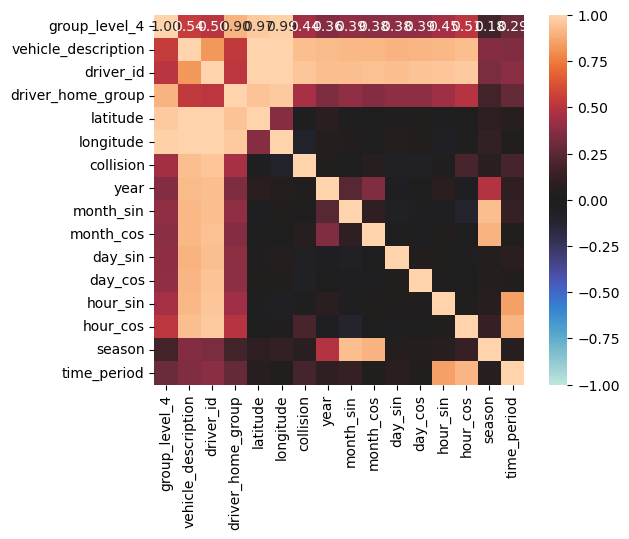

In [58]:
corr, ax = d.nominal.associations(c, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


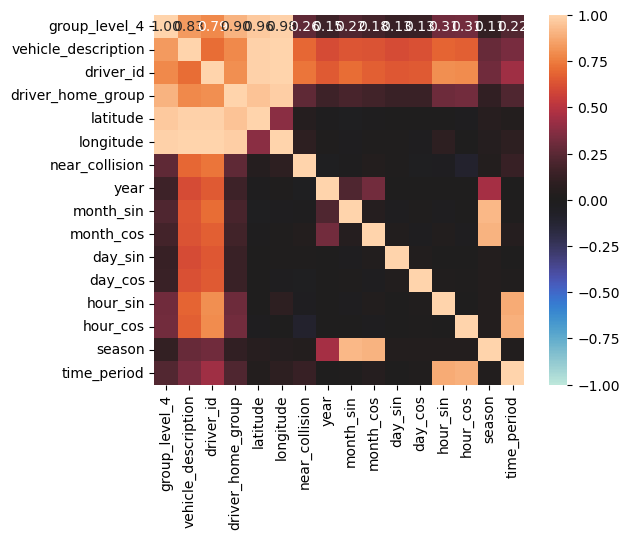

In [59]:
corr2, ax2 = d.nominal.associations(nc, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


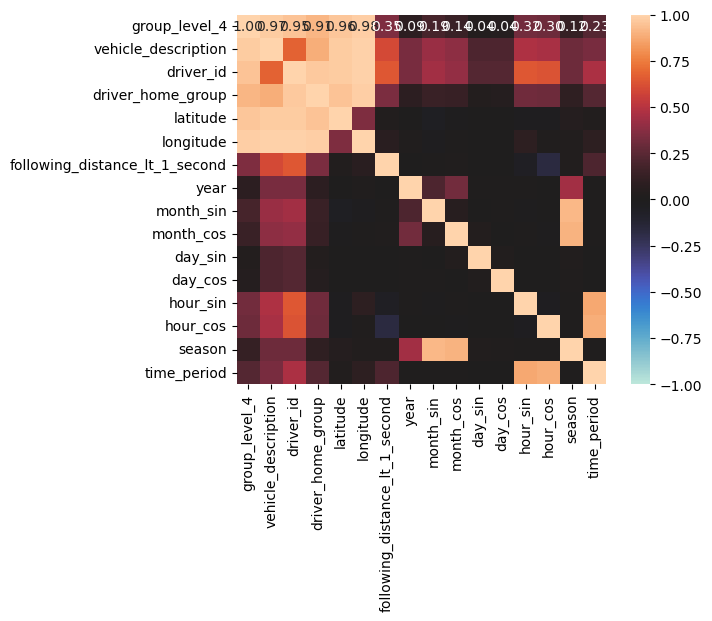

In [60]:
corr3, ax3 = d.nominal.associations(fd, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


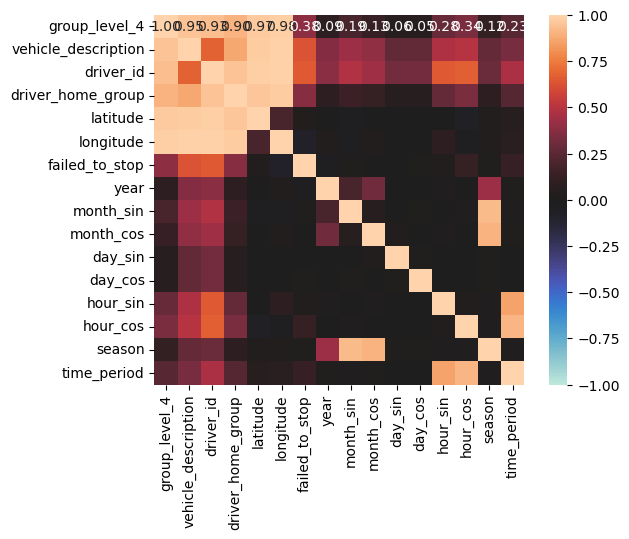

In [61]:
corr4, ax4 = d.nominal.associations(fs, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


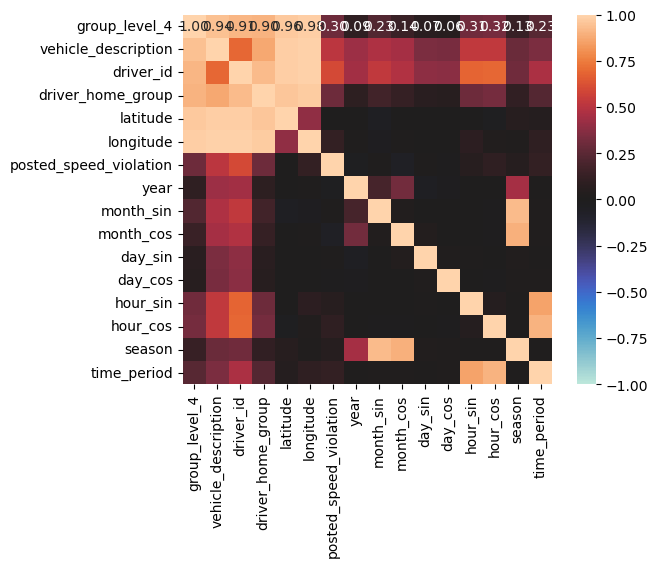

In [62]:
corr5, ax5 = d.nominal.associations(s, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


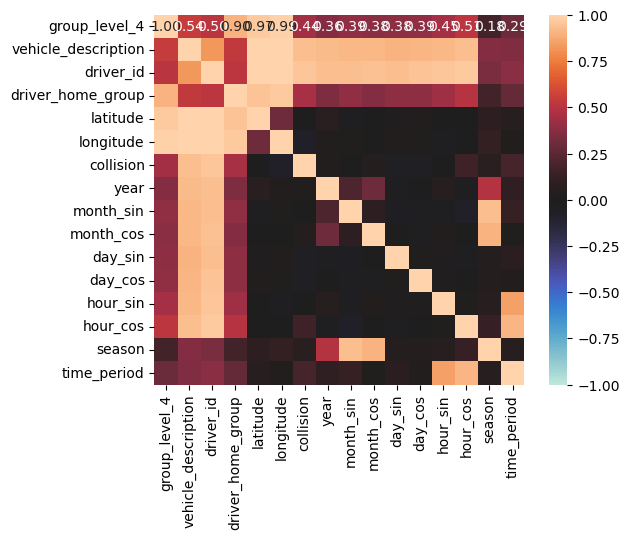

In [63]:
dep, ax6 = d.nominal.associations(c, num_num_assoc = 'kendall')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


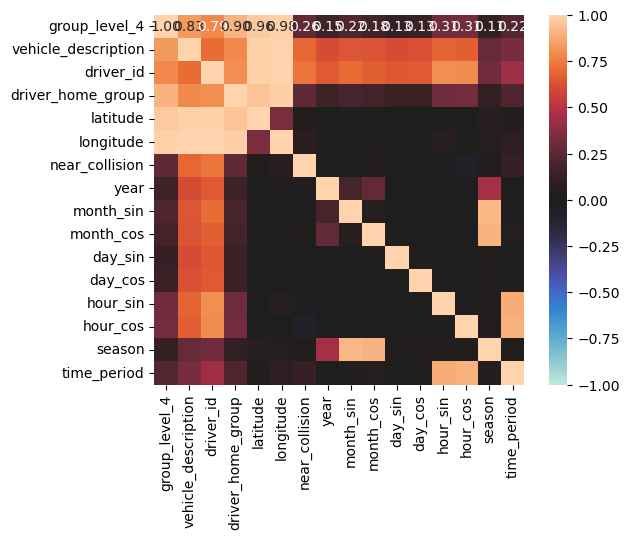

In [64]:
dep2, ax7 = d.nominal.associations(nc, num_num_assoc = 'kendall')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


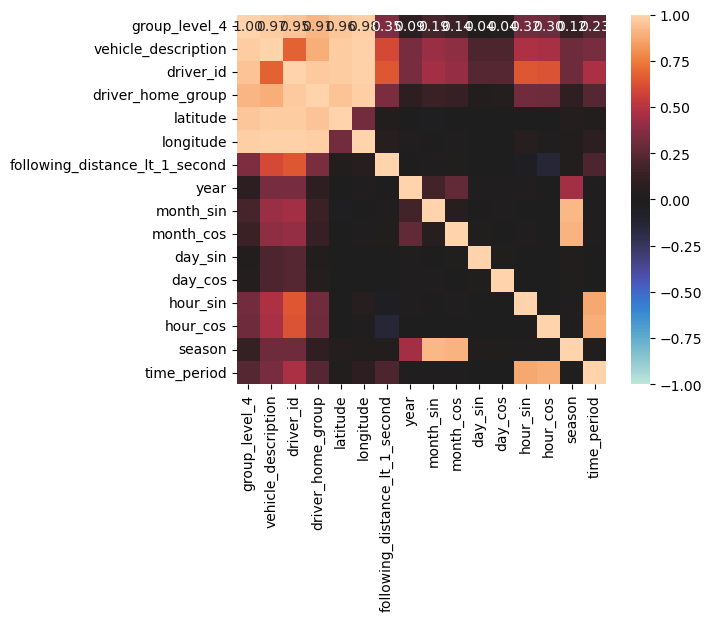

In [65]:
dep3, ax8 = d.nominal.associations(fd, num_num_assoc = 'kendall')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


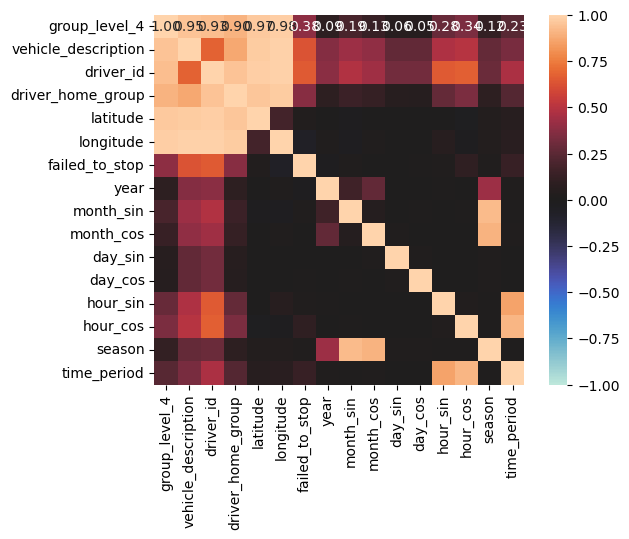

In [66]:
dep4, ax9 = d.nominal.associations(fs, num_num_assoc = 'kendall')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


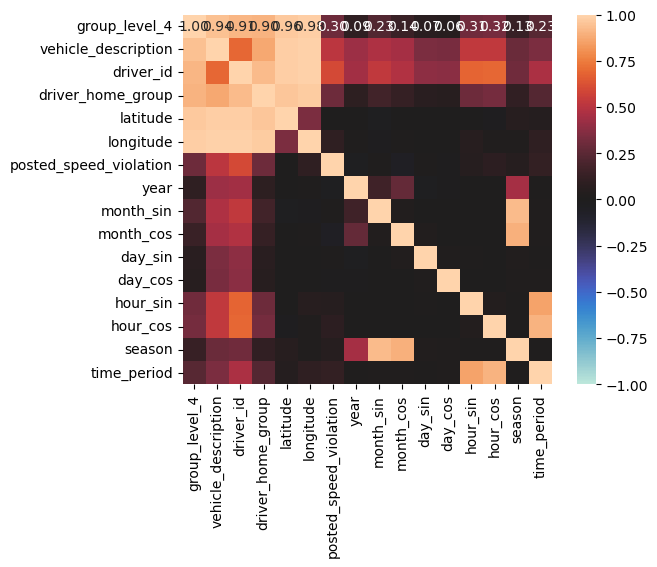

In [67]:
dep5, ax10 = d.nominal.associations(s, num_num_assoc = 'kendall')

In [68]:
c.to_csv(r'C:\Users\nayakr\Desktop\Notes\QGIS\collision counties\collision.csv')
nc.to_csv(r'C:\Users\nayakr\Desktop\Notes\QGIS\collision counties\near_collision.csv')
fd.to_csv(r'C:\Users\nayakr\Desktop\Notes\QGIS\collision counties\fd_lt_1_s.csv')
fs.to_csv(r'C:\Users\nayakr\Desktop\Notes\QGIS\collision counties\failed_to_stop.csv')
s.to_csv(r'C:\Users\nayakr\Desktop\Notes\QGIS\collision counties\speeding.csv')

# Data with Lat Long and Counties

In [69]:
def clean(f):
    f = f.iloc[:, 1:17]
    f.STATEFP = f.STATEFP.astype('str')
    f.COUNTYFP = f.COUNTYFP.astype('str')
    f.group_level_4 = f.group_level_4.astype('str')
    f.driver_home_group = f.driver_home_group.astype('str')
    return f

In [49]:
collision = pd.read_csv('collision_counties.csv', low_memory=False)
near_collision = pd.read_csv('near_collision_counties.csv', low_memory=False)
fd_lt_1_s = pd.read_csv('fd_lt_1_s_counties.csv', low_memory=False)
failed_to_stop = pd.read_csv('failed_to_stop_counties.csv', low_memory=False)
speeding = pd.read_csv('speeding_counties.csv', low_memory=False)

In [50]:
c = clean(collision)
nc = clean(near_collision)
fd = clean(fd_lt_1_s)
fs = clean(failed_to_stop)
s = clean(speeding)

In [51]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   group_level_4        1095 non-null   object 
 1   vehicle_description  1095 non-null   object 
 2   driver_id            1059 non-null   object 
 3   driver_home_group    1095 non-null   object 
 4   latitude             1095 non-null   float64
 5   longitude            1095 non-null   float64
 6   collision            1095 non-null   bool   
 7   year                 1095 non-null   int64  
 8   month_sin            1095 non-null   float64
 9   month_cos            1095 non-null   float64
 10  day_sin              1095 non-null   float64
 11  day_cos              1095 non-null   float64
 12  hour_sin             1095 non-null   float64
 13  hour_cos             1095 non-null   float64
 14  STATEFP              1095 non-null   object 
 15  COUNTYFP             1095 non-null   o

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


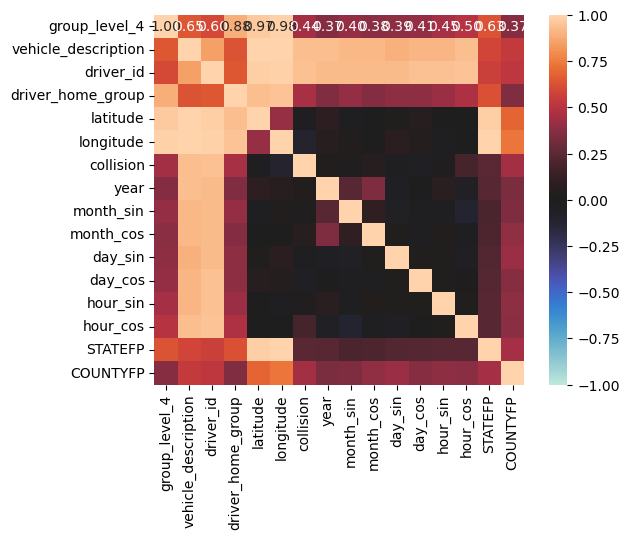

In [52]:
corr, ax = d.nominal.associations(c, num_num_assoc = 'spearman')

str

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


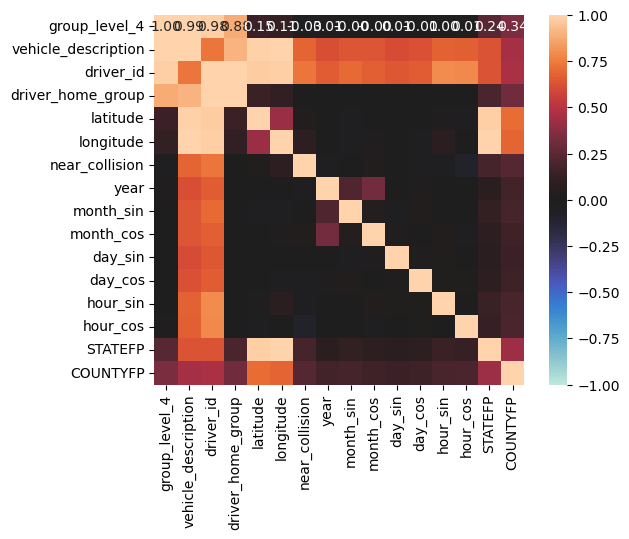

In [41]:
corr2, ax2 = d.nominal.associations(nc, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


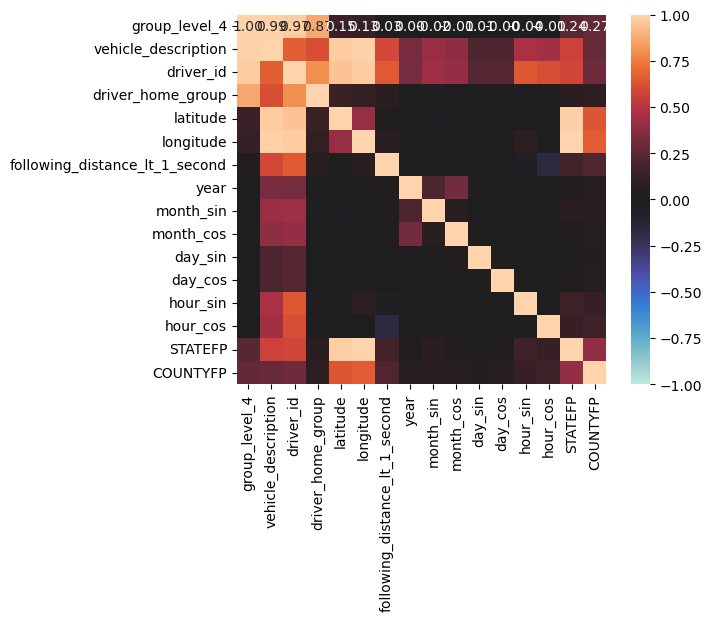

In [42]:
corr3, ax3 = d.nominal.associations(fd, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


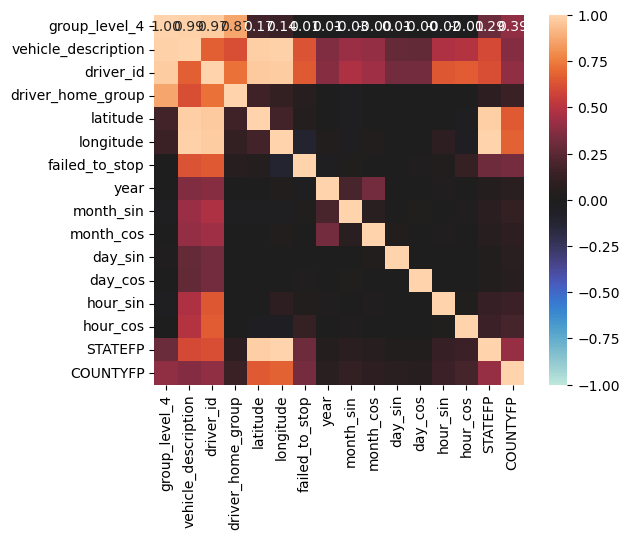

In [43]:
corr4, ax4 = d.nominal.associations(fs, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


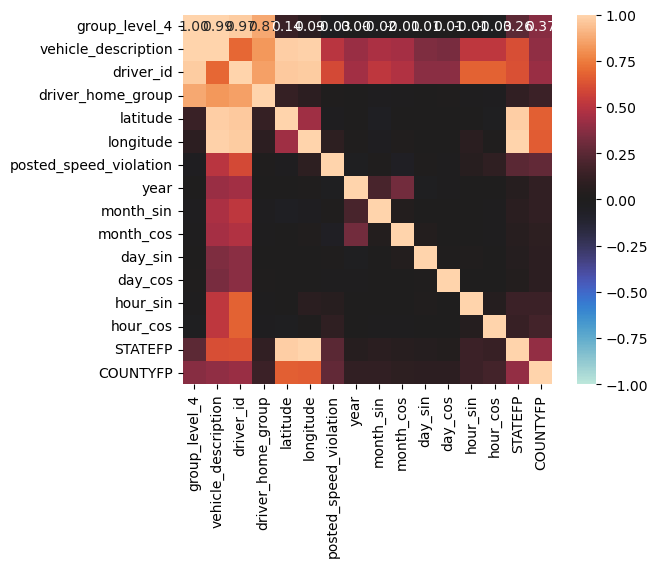

In [44]:
corr5, ax5 = d.nominal.associations(s, num_num_assoc = 'spearman')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


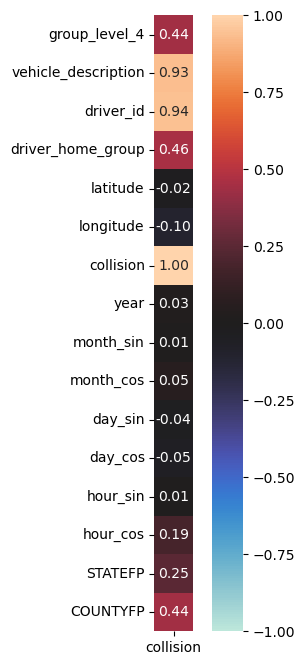

In [57]:
corr6, ax6 = d.nominal.associations(c, num_num_assoc = 'spearman', display_columns = 'collision', figsize = (5,8), filename='c_corr.png')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


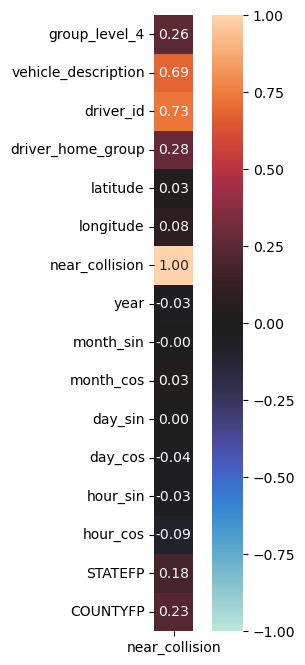

In [59]:
corr6, ax6 = d.nominal.associations(nc, num_num_assoc = 'spearman', display_columns = 'near_collision', figsize = (5,8), filename='nc_corr.png')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


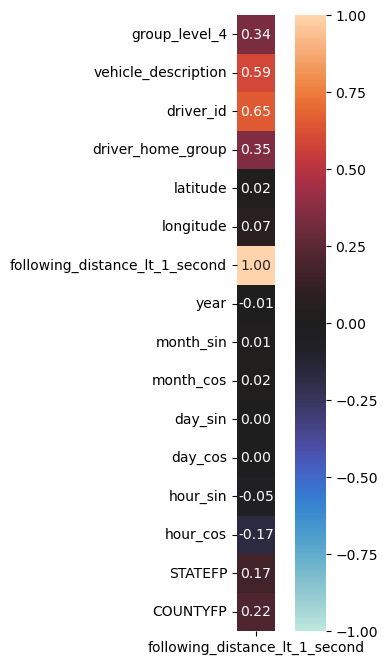

In [60]:
corr6, ax6 = d.nominal.associations(fd, num_num_assoc = 'spearman', display_columns = 'following_distance_lt_1_second', figsize = (5,8), filename='fd_corr.png')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


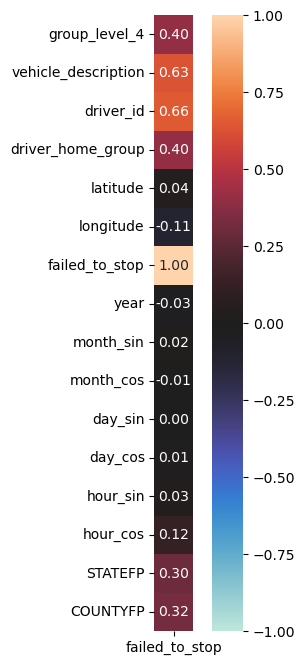

In [61]:
corr6, ax6 = d.nominal.associations(fs, num_num_assoc = 'spearman', display_columns = 'failed_to_stop', figsize = (5,8), filename='fs_corr.png')

C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:736: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
C:\Users\nayakr\AppData\Roaming\Python\Python311\site-packages\dython\nominal.py:737: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


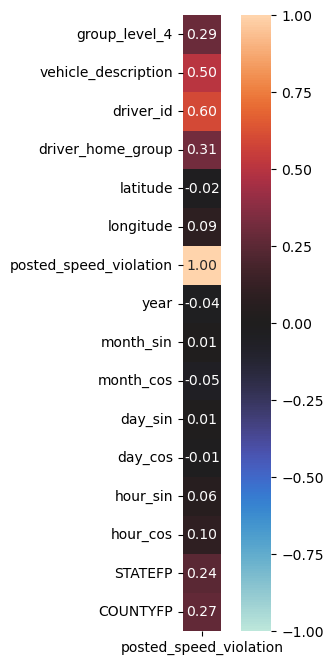

In [62]:
corr6, ax6 = d.nominal.associations(s, num_num_assoc = 'spearman', display_columns = 'posted_speed_violation', figsize = (5,8), filename='s_corr.png')